In [1]:
import pandas as pd
from neuronunit.optimisation.optimization_management import instance_opt
from neuronunit.optimisation.optimization_management import plot_as_normal

pd.set_option('max_columns',None)
pd.set_option('max_rows',None)

import matplotlib.pyplot as plt
#plt.plot()
#plt.show()

import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)
import pickle
import glob
import os
from neuronunit.optimisation.optimization_management import check_binary_match, which_key
from neuronunit.optimisation.optimization_management import check_match_front, inject_and_not_plot_model
from neuronunit.capabilities.spike_functions import get_spike_waveforms#
#check_match_front, inject_and_not_plot_model
import os
import pickle
from neuronunit.optimisation.optimization_management import TSD

from neuronunit.optimisation.model_parameters import MODEL_PARAMS
from neuronunit.optimisation.brian_glif_model_parameters import MODEL_PARAMS as OTHER_MODEL_PARAMS
import scipy
from neuronunit.optimisation.optimization_management import inject_and_not_plot_model, plot_as_normal
from neuronunit.optimisation.optimization_management import inject_and_plot_model, plot_as_normal


In [2]:
#import quantities as pq
#pq.PREFERED

In [3]:


cells = pickle.load(open("processed_multicellular_constraints.p","rb"))

purk = TSD(cells['Cerebellum Purkinje cell'])#.tests
purk_vr = purk["RestingPotentialTest"].observation['mean']

ncl5 = TSD(cells["Neocortex pyramidal cell layer 5-6"])
ncl5.name = str("Neocortex pyramidal cell layer 5-6")
ncl5_vr = ncl5["RestingPotentialTest"].observation['mean']

ca1 = TSD(cells['Hippocampus CA1 pyramidal cell'])
ca1_vr = ca1["RestingPotentialTest"].observation['mean']


#olf = TSD(pickle.load(open("olf_tests.p","rb")))
#olf.use_rheobase_score = False
#cells.pop('Olfactory bulb (main) mitral cell',None)
#cells['olf_mit'] = olf

experimental_constraints= cells

list_of_dicts = []
for k,v in cells.items():
    observations = {}
    for k1 in ca1.keys():
        vsd = TSD(v)
        if k1 in vsd.keys():
            vsd[k1].observation['mean']
            observations[k1] = vsd[k1].observation['mean']
            observations['name'] = k
    list_of_dicts.append(observations)
df = pd.DataFrame(list_of_dicts)
df
df = df.set_index('name').T

s = df.style.background_gradient(cmap=cm)
s

name,nan,Hippocampus CA1 pyramidal cell,Cerebellum Purkinje cell,Neocortex pyramidal cell layer 5-6
RheobaseTest,nan,189.24 pA,680.794444444444 pA,213.849583333333 pA
InputResistanceTest,nan,107.080327644332 Mohm,142.057692307692 Mohm,120.672073643411 Mohm
TimeConstantTest,nan,24.5021946169772 ms,nan,15.7342424242424 ms
CapacitanceTest,nan,89.7960714285714 pF,620.2725 pF,150.584166666667 pF
RestingPotentialTest,nan,-65.2261863636364 mV,-61.5916666666667 mV,-68.2481434599156 mV
InjectedCurrentAPWidthTest,nan,1.31895278450363 ms,0.41412962962963 ms,1.20769387755102 ms
InjectedCurrentAPAmplitudeTest,nan,86.364525297619 mV,71.2308333333333 mV,80.4351020408164 mV
InjectedCurrentAPThresholdTest,nan,-47.5985714285714 mV,-46.8947619047619 mV,-42.7357232704403 mV


In [4]:
!pwd

/home/user/git/BluePyOpt/examples/bpo_nu_fusion


In [5]:
try:
    temp = TSD(pickle.load(open("Neocortex pyramidal cell layer 5-6"+"IZHI_.p","rb")))
    final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value = temp
except:
    MU = 10
    NGEN = 10
    final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value = instance_opt(
        TSD(experimental_constraints["Neocortex pyramidal cell layer 5-6"]),
        MODEL_PARAMS,"Neocortex pyramidal cell layer 5-6","IZHI",
        MU,NGEN,"IBEA",use_streamlit=False)
    
    temp = final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value
    pickle.dump(temp,open("Neocortex pyramidal cell layer 5-6"+"IZHI_.p","wb"))
    chi_sqr_opt, p_value
chi_sqr_opt, p_value
df = pd.DataFrame([{'chi_square':chi_sqr_opt,'p_value':p_value}]).T    
    

,observations,predictions,Z-Scores
RheobaseTest,213.85 pA,122.57 pA,0.52
InputResistanceTest,120.67 megaohm,25.15 megaohm,1.52
TimeConstantTest,15.73 ms,1681.05 ms,227.8
CapacitanceTest,150.58 pF,66831.6 pF,477.4
RestingPotentialTest,-68.25 mV,-65.23 mV,0.44
InjectedCurrentAPWidthTest,1.21 ms,0.75 ms,0.94
InjectedCurrentAPAmplitudeTest,80.44 mV,56.81 mV,2.75
InjectedCurrentAPThresholdTest,-42.74 mV,-35.67 mV,0.97


In [6]:
opt.SA.to_frame().T

,RheobaseTest,InputResistanceTest,TimeConstantTest,CapacitanceTest,RestingPotentialTest,InjectedCurrentAPWidthTest,InjectedCurrentAPAmplitudeTest,InjectedCurrentAPThresholdTest
0,0.523743,1.520725,227.8,477.4,0.440614,0.937275,2.750747,0.968252


In [7]:
opt.make_pretty(opt.tests)
opt.obs_preds

,observations,predictions,Z-Scores
RheobaseTest,213.85 pA,122.57 pA,0.52
InputResistanceTest,120.67 megaohm,25.15 megaohm,1.52
TimeConstantTest,15.73 ms,1681.05 ms,227.8
CapacitanceTest,150.58 pF,66831.6 pF,477.4
RestingPotentialTest,-68.25 mV,-65.23 mV,0.44
InjectedCurrentAPWidthTest,1.21 ms,0.75 ms,0.94
InjectedCurrentAPAmplitudeTest,80.44 mV,56.81 mV,2.75
InjectedCurrentAPThresholdTest,-42.74 mV,-35.67 mV,0.97


# Izhikevich model Hippocampus CA1 pyramidal experiment.

In [8]:
try:
    temp = pickle.load(open("Hippocampus CA1 pyramidal cell"+"IZHI_.p","rb"))
    final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value = temp
except:
    MU = 45
    NGEN = 150
    final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value = instance_opt(
        TSD(experimental_constraints['Hippocampus CA1 pyramidal cell']),
        MODEL_PARAMS,'Hippocampus CA1 pyramidal cell',"IZHI",
        MU,NGEN,"IBEA",use_streamlit=False)

    temp = final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value
    pickle.dump(temp,open('Hippocampus CA1 pyramidal cell'+"IZHI_.p","wb"))
chi_sqr_opt, p_value
chi_sqr_opt, p_value
pd.DataFrame([{'chi_square':chi_sqr_opt,'p_value':p_value}])

,chi_square,p_value
0,1.553503e+06,0.0


In [9]:
opt.make_pretty(opt.tests)
opt.obs_preds

,observations,predictions,Z-Scores
RheobaseTest,189.24 pA,122.57 pA,0.2
InputResistanceTest,107.08 megaohm,25.15 megaohm,1.23
TimeConstantTest,24.5 ms,1681.05 ms,77.09
CapacitanceTest,89.8 pF,66831.6 pF,1244
RestingPotentialTest,-65.23 mV,-65.23 mV,0
InjectedCurrentAPWidthTest,1.32 ms,0.75 ms,1.05
InjectedCurrentAPAmplitudeTest,86.36 mV,56.81 mV,4.14
InjectedCurrentAPThresholdTest,-47.6 mV,-35.67 mV,2.1


[-61.56837364] mV [ True]


(AnalogSignal with 1 channels of length 4400; units mV; datatype float64 
 sampling rate: 4.0 1/ms
 time: 0.0 s to 1.1 s,
 <module 'matplotlib.pyplot' from '/home/user/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>,
 <neuronunit.optimisation.data_transport_container.DataTC at 0x7f65cdf305d0>)

<Figure size 432x288 with 0 Axes>

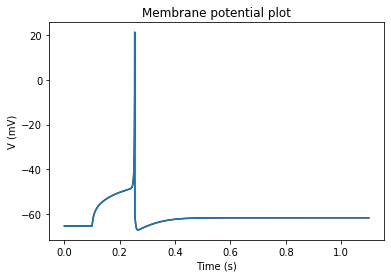

In [10]:
opt.SA

out = inject_and_plot_model(opt,plotly=False)

out


# Conductance Based model Hippocampus CA1 pyramidal experiment.

In [11]:

try:

    temp = pickle.load(open("Hippocampus CA1 pyramidal cell"+"NEURONHH_.p","rb"))
    final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value = temp
except:
    MU = 10
    NGEN = 45
    final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value = instance_opt(
        experimental_constraints['Hippocampus CA1 pyramidal cell'],
        MODEL_PARAMS,'Hippocampus CA1 pyramidal cell',"NEURONHH",
        MU,NGEN,"IBEA",use_streamlit=False)

    temp = final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value
    pickle.dump(temp,open('Hippocampus CA1 pyramidal cell'+"NEURONHH_.p","wb"))
chi_sqr_opt, p_value
pd.DataFrame([{'chi_square':chi_sqr_opt,'p_value':p_value}])

AttributeError: 'TestSuite' object has no attribute 'values'

In [ ]:
chi_sqr_opt, p_value
pd.DataFrame([{'chi_square':chi_sqr_opt,'p_value':p_value}])

In [ ]:

out = inject_and_not_plot_model(opt)

In [ ]:
opt.SA.to_frame().T

In [ ]:
opt.make_pretty(opt.tests)
opt.obs_preds

In [ ]:
plt.plot(out.times,out.magnitude)
plt.show()


# Adaptive Exponential Model Hippocampus CA1 pyramidal Experiment.

In [ ]:
try:
    temp = pickle.load(open("Hippocampus CA1 pyramidal cell"+"ADEXP_.p","rb"))
    final_pop, hall_of_fame, logs, hist, ad_opt, obs_preds, chi_sqr_opt, p_value = temp
except:
    MU = 25
    NGEN = 100
    final_pop, hall_of_fame, logs, hist, ad_opt, obs_preds, chi_sqr_opt, p_value = instance_opt(
        experimental_constraints['Hippocampus CA1 pyramidal cell'],
        MODEL_PARAMS,'Hippocampus CA1 pyramidal cell',"ADEXP",
        MU,NGEN,"IBEA",use_streamlit=False)

    temp = final_pop, hall_of_fame, logs, hist, ad_opt, obs_preds, chi_sqr_opt, p_value
    pickle.dump(temp,open('Hippocampus CA1 pyramidal cell'+"ADEXP_.p","wb"))


In [ ]:
plt_tuple = inject_and_plot_model(ad_opt,plotly=False)

In [ ]:
plt_tuple[1].show()

In [ ]:
chi_sqr_opt, p_value
pd.DataFrame([{'chi_square':chi_sqr_opt,'p_value':p_value}]).T

In [ ]:
opt.SA.to_frame().T

In [ ]:
opt.make_pretty(opt.tests)
opt.obs_preds

# Olfactory Mitral Cell Experiment/ Izhikevich Model

In [ ]:
if type(experimental_constraints['olf_mit']) is not type(list()):
    experimental_constraints['olf_mit'] = list(experimental_constraints['olf_mit'].values())    
try:
    temp = pickle.load(open("olf_mit"+"IZHI_.p","rb"))
    final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value = temp
except:
    MU = 40
    NGEN = 150
    final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value = instance_opt(
        experimental_constraints['olf_mit'],
        MODEL_PARAMS,'olf_mit',"IZHI",
        MU,NGEN,"IBEA",use_streamlit=False)

    temp = final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value
    pickle.dump(temp,open('olf_mit'+"IZHI_.p","wb"))


In [ ]:
pd.DataFrame([{'chi_square':chi_sqr_opt,'p_value':p_value}]).T

In [ ]:
opt.SA.to_frame().T

In [ ]:
opt.make_pretty(opt.tests)
opt.obs_preds

# Neocortex Pyramidal Experiment Conductance based model

# Cerebellum Purkinje cell Experiment Conductance Izhikevich Model

In [ ]:
    
try:
    temp = pickle.load(open("Cerebellum Purkinje cell"+"IZHI_.p","rb"))
    final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value = temp
except:
    MU = 25
    NGEN = 200
    final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value = instance_opt(
        experimental_constraints['Cerebellum Purkinje cell'],
        MODEL_PARAMS,'Cerebellum Purkinje cell',"IZHI",
        MU,NGEN,"IBEA",use_streamlit=False)

    temp =  final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value
    pickle.dump(temp,open('Cerebellum Purkinje cell'+"IZHI_.p","wb"))


In [ ]:
    
try:
    temp = pickle.load(open("Neocortex pyramidal cell layer 5-6"+"ADEXP_.p","rb"))
    final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value = temp
except:
    MU = 10
    NGEN = 150
    final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value = instance_opt(
        experimental_constraints['Neocortex pyramidal cell layer 5-6'],
        MODEL_PARAMS,'Neocortex pyramidal cell layer 5-6',"ADEXP",
        MU,NGEN,"IBEA",use_streamlit=False)

    temp = final_pop, hall_of_fame, logs, hist, opt, obs_preds
    pickle.dump(temp,open('Neocortex pyramidal cell layer 5-6'+"ADEXP_.p","wb"))


In [ ]:
'''
temp = pickle.load(open("Neocortex pyramidal cell layer 5-6"+"IZHI_.p","rb"))
final_pop, hall_of_fame, logs, hist, opt, obs_preds = temp
zvalues_opt = opt.SA.values
chi_sqr_opt= np.sum(zvalues_opt**2)
print(1-scipy.stats.chi2.cdf(chi_sqr_opt, 8))

'''

In [ ]:
OM = opt.dtc_to_opt_man()
stats = OM.random_sample(opt,100)


In [ ]:

#stats
from neuronunit.optimisation.optimization_management import plot_as_normal_all, plot_as_normal

plot_as_normal_all(opt,stats['best_random_model'])
import numpy as np
np.mean(opt.SA.values)
opt.SA.values

In [ ]:
z_random=[]
import numpy as np
#dir(stats['best_random_model'].SA['RheobaseTest'])
for t in stats['best_random_model'].tests:
    model = stats['best_random_model'].dtc_to_model()
    score = t.judge(model)
    z_random.append(np.abs(float(score.raw)))
#np.mean(mean_random)

#[z**2 for z in z_random]
z_random

In [ ]:
chi_sqr_random = np.sum(np.array(z_random)**2)

#chi_sqr_random = np.sum(zvalues_opt**2)
print(1-scipy.stats.chi2.cdf(chi_sqr_random, 8))

In [ ]:
frame = opt.SA.to_frame()
score_frame = frame.T
score_frame

In [ ]:
opt.make_pretty(opt.tests)
opt.obs_preds

In [ ]:

from neuronunit.optimisation.optimization_management import plot_as_normal_all, plot_as_normal
opt.rheobase
plot_as_normal(opt)
plot_as_normal_all(opt,stats['best_random_model'])


In [ ]:
#assert 1==2



In [ ]:
from neuronunit.optimisation.model_parameters import MODEL_PARAMS
MU = 15
NGEN = 80
final_pop, hall_of_fame, logs, hist, opt, obs_preds = instance_opt(
    experimental_constraints["Cerebellum Purkinje cell"],
    MODEL_PARAMS,"Cerebellum Purkinje cell","ADEXP",
    MU,NGEN,"IBEA",use_streamlit=False)

opt.obs_preds.T

In [ ]:
    
try:
    temp = pickle.load(open("Neocortex pyramidal cell layer 5-6"+"NEURON_HH_.p","rb"))
    final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value = temp
except:
    MU = 10
    NGEN = 10
    final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value = instance_opt(
        experimental_constraints['Neocortex pyramidal cell layer 5-6'],
        MODEL_PARAMS,'Neocortex pyramidal cell layer 5-6',"NEURON_HH",
        MU,NGEN,"IBEA",use_streamlit=False)

    temp = final_pop, hall_of_fame, logs, hist, opt, obs_preds
    pickle.dump(temp,open('Neocortex pyramidal cell layer 5-6'+"NEURON_HH.p","wb"))

In [ ]:
OM = opt.dtc_to_opt_man()
stats = OM.random_sample(opt,100)

from neuronunit.optimisation.optimization_management import plot_as_normal_all, plot_as_normal
opt.rheobase
plot_as_normal(opt)


In [ ]:
plot_as_normal_all(opt,stats['best_random_model'])


In [ ]:
opt.backend

from neuronunit.optimisation.optimization_management import inject_and_plot_model, inject_and_plot_model30

In [ ]:
vm,plt,pre_model = inject_and_plot_model(opt,plotly=False)

In [ ]:
inject_and_plot_model30(opt)#,plotly=False)

In [ ]:

from neuronunit.optimisation.model_parameters import MODEL_PARAMS
MU = 25
NGEN = 100

final_pop, hall_of_fame, logs, hist, opt, obs_preds = instance_opt(
    experimental_constraints["Hippocampus CA1 pyramidal cell"],
    MODEL_PARAMS,"Hippocampus CA1 pyramidal cell",
    "IZHI",MU,NGEN,"IBEA",use_streamlit=False)


In [ ]:
final_pop, hall_of_fame, logs, hist, opt, obs_preds = instance_opt(
    experimental_constraints["olf_mit"],
    MODEL_PARAMS,"olf_mit","IZHI",
    MU,NGEN,"IBEA",use_streamlit=False)



In [ ]:
'''
from deap import creator, base, tools
import array
toolbox = base.Toolbox()



creator.create("FitnessMin", base.Fitness, weights=tuple(-1.0 for i in range(0,8)))
creator.create("Individual", array.array, typecode='d', fitness=creator.FitnessMin)
toolbox.register("population", tools.initRepeat, list, creator.Individual)
list_out = pickle.load(open('dump_neuron_olf.p','rb'))
neuron_olf = list_out[1][0].dtc

neuron_olf.SA
neuron_olf.get_agreement()
neuron_olf.agreement
neuron_olf.SA
neuron_olf.agreement    
neuron_olf.name = 'olf_mit'
'''

In [ ]:
'''
models_hh=[]
for f in hh_files:
    model = pickle.load(open(f,'rb'))
    print(f)
    try:
        model.name = f
        models_hh.append(model)
    except:
        pass
models_hh_r = models_hh[::-1]
for m in models_hh_r:
    print(m.name)
    

models_hh_r.append(neuron_olf)

models_hh.append(neuron_olf)
'''

In [ ]:
from sciunit.scores import ZScore
from scipy.stats import norm
import numpy as np


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math


#dtc = neuron_olf

In [ ]:
'''
fig,axes = plt.subplots(2,math.ceil(len(dtc.tests)/2),figsize=(20,8))
plt.style.use('fivethirtyeight')

#axes[0,0].plot(scores)
axes[0,0].set_title('Optimized model position relative to data')

for i,t in enumerate(dtc.tests):

    t.score_type = ZScore
    model = dtc.dtc_to_model()
    score = t.judge(model)
    x1 = -1.01
    x2 = 1.0
    sigma = 1.0
    mu = 0
    x = np.arange(-sigma, sigma, 0.001) # range of x in spec
    x_all = np.arange(-sigma, sigma, 0.001) 
    y_point = norm.pdf(mu+float(score.raw),0,1)
    y2 = norm.pdf(x_all,0,1)

    y = norm.pdf(x,0,1)
    y2 = norm.pdf(x_all,0,1)

    ax = axes.flat[i]

    x_point = mu+float(score.raw)

    ax.scatter(x_point,y_point,c='r',s=300,marker='o')
    name = t.name.split('Test')[0]

    ax.set_title(str(name)+str(' ')+str(t.observation['mean'].units))
    ax.plot(x_all,y2)
    ax.set_xlim([-1.0,1.0])
plt.show()

'''

In [ ]:
'''
import numpy as np
import matplotlib.pyplot as plt

# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-1, 1, 0.001)
# Mean = 0, SD = 2.
plt.plot(x_axis, norm.pdf(x_axis,0,10))
plt.show()
'''

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
from scipy.stats import norm

def z_val(sig_level=0.05, two_tailed=True):
    """Returns the z value for a given significance level"""
    z_dist = scs.norm()
    if two_tailed:
        sig_level = sig_level/2
        area = 1 - sig_level
    else:
        area = 1 - sig_level

    z = z_dist.ppf(area)

    return z
  
  
def zplot(x_point,y_point,area=0.95, two_tailed=True, align_right=False):
    """Plots a z distribution with common annotations
    Example:
        zplot(area=0.95)
        zplot(area=0.80, two_tailed=False, align_right=True)
    Parameters:
        area (float): The area under the standard normal distribution curve.
        align (str): The area under the curve can be aligned to the center
            (default) or to the left.
    Returns:
        None: A plot of the normal distribution with annotations showing the
        area under the curve and the boundaries of the area.
    """
    # create plot object
    fig = plt.figure(figsize=(12, 6))
    ax = fig.subplots()
    # create normal distribution
    norm = scs.norm()
    # create data points to plot
    x = np.linspace(-5, 5, 1000)
    y = norm.pdf(x)

    ax.plot(x, y)
    ax.scatter(x_point,y_point,c='r',s=300,marker='o')

    # code to fill areas for two-tailed tests
    if two_tailed:
        left = norm.ppf(0.5 - area / 2)
        right = norm.ppf(0.5 + area / 2)
        ax.vlines(right, 0, norm.pdf(right), color='grey', linestyle='--')
        ax.vlines(left, 0, norm.pdf(left), color='grey', linestyle='--')

        ax.fill_between(x, 0, y, color='grey', alpha='0.25',
                        where=(x > left) & (x < right))
        plt.xlabel('z')
        plt.ylabel('PDF')
        plt.text(left, norm.pdf(left), "z = {0:.3f}".format(left), fontsize=12,
                 rotation=90, va="bottom", ha="right")
        plt.text(right, norm.pdf(right), "z = {0:.3f}".format(right),
                 fontsize=12, rotation=90, va="bottom", ha="left")
    # for one-tailed tests
    else:
        # align the area to the right
        if align_right:
            left = norm.ppf(1-area)
            ax.vlines(left, 0, norm.pdf(left), color='grey', linestyle='--')
            ax.fill_between(x, 0, y, color='grey', alpha='0.25',
                            where=x > left)
            plt.text(left, norm.pdf(left), "z = {0:.3f}".format(left),
                     fontsize=12, rotation=90, va="bottom", ha="right")
        # align the area to the left
        else:
            right = norm.ppf(area)
            ax.vlines(right, 0, norm.pdf(right), color='grey', linestyle='--')
            ax.fill_between(x, 0, y, color='grey', alpha='0.25',
                            where=x < right)
            plt.text(right, norm.pdf(right), "z = {0:.3f}".format(right),
                     fontsize=12, rotation=90, va="bottom", ha="left")

    # annotate the shaded area
    plt.text(0, 0.1, "shaded area = {0:.3f}".format(area), fontsize=12,
             ha='center')
    # axis labels
    plt.xlabel('z')
    plt.ylabel('PDF')
    

In [ ]:


for i,t in enumerate(dtc.tests):

    t.score_type = ZScore
    model = dtc.dtc_to_model()
    score = t.judge(model)
    x1 = -1.01
    x2 = 1.0
    sigma = 1.0
    mu = 0
    x = np.arange(-sigma, sigma, 0.001) # range of x in spec
    x_all = np.arange(-sigma, sigma, 0.001) 
    y_point = norm.pdf(mu+float(score.raw),0,1)
    y2 = norm.pdf(x_all,0,1)

    y = norm.pdf(x,0,1)
    y2 = norm.pdf(x_all,0,1)

    ax = axes.flat[i]

    x_point = mu+float(score.raw)
    zplot(x_point,y_point)
    break
    
    ax.scatter(x_point,y_point,c='r',s=300,marker='o')
    name = t.name.split('Test')[0]

    ax.set_title(str(name)+str(' ')+str(t.observation['mean'].units))
    ax.plot(x_all,y2)
    ax.set_xlim([-1.0,1.0])
    
#plt.show()


In [ ]:
for i,t in enumerate(dtc.tests):
    print(t.name)

In [ ]:
zplot(x_point,y_point)


In [ ]:

    
list_of_dics = []    
for m in models_hh_r:
    name = str(m.name)
    try:
        name = name.split('dump_')[1]
    except:
        name = name
    m.SA['name'] = name
    temp = {str(k):v for k,v in m.SA.items()}
    list_of_dics.append(temp)
df_scores = pd.DataFrame(list_of_dics)
df_scores
df_scores = df_scores.set_index('name').T
df_scores

In [ ]:
models_izhi=[]
for f in izhi_files:
    model = pickle.load(open(f,'rb'))
    model.name = f
    #print(f)
    models_izhi.append(model)
    
for m in models_izhi:
    print(m.name)    
    
list_of_dics = []    
for m in models_izhi:
    name = str(m.name)
    try:
        name = name.split('dump_')[1]
    except:
        name = name
    m.SA['name'] = name
    temp = {str(k):v for k,v in m.SA.items()}
    list_of_dics.append(temp)
df_scores = pd.DataFrame(list_of_dics)
df_scores
df_scores = df_scores.set_index('name').T
df_scores

In [ ]:
from neuronunit.optimisation.optimization_management import check_match_front, inject_and_not_plot_model
from neuronunit.capabilities.spike_functions import get_spike_waveforms#check_match_front, inject_and_not_plot_model

vms_hh = []
for dtc in models_hh_r:
    vms_hh.append(get_spike_waveforms(inject_and_not_plot_model(dtc)))

from matplotlib.pyplot import figure
#figure(num=None, figsize=(50, 50), dpi=80)#, facecolor='w', edgecolor='k')
plt.figure(figsize=(12, 12))
print(len(vms_hh),len(models_hh))
for v,f in zip(vms_hh,models_hh_r):
    name = str(f.name)
    try:
        name2 = name.split('dump_hh_')[1]
    except:
        name2 = name
    plt.plot(v.times, v.magnitude,label=name2)
plt.xlabel('Time (ms)')

plt.ylabel('V (mV)')
plt.legend(loc="upper left")

plt.legend()
plt.show()

In [ ]:

vms_izhi = []
for dtc in models_izhi:
    dtc.backend = "IZHI"
    vms_izhi.append(get_spike_waveforms(inject_and_not_plot_model(dtc)))

plt.figure(figsize=(12, 12), dpi=80)
print(len(vms_izhi),len(models_izhi))
#figure(num=None, figsize=(125, 125), dpi=80, facecolor='w', edgecolor='k')

for v,f in zip(vms_izhi,models_izhi):
    name = str(f.name)
    try:
        name2 = name.split('dump_izhi_')[1]
    except:
        name2 = name
    plt.plot(v.times, v.magnitude,label=name2)

plt.xlabel('Time (ms)')

plt.ylabel('V (mV)')
plt.legend(loc="upper left")

plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12, 12), dpi=80)
colors = ['b','g','r','y']
cnt = 0
for v0,f0,v1,f1 in zip(vms_hh,models_hh_r,vms_izhi,models_izhi):
    name = str(f0.name)
    try:
        name2 = name.split('dump_hh_')[1]
    except:
        name2 = name
    plt.plot(v0.times, v0.magnitude,label=name2,c=colors[cnt])
    plt.plot(v1.times, v1.magnitude,c=colors[cnt])

    plt.xlabel('Time (ms)')

    plt.ylabel('V (mV)')
    plt.legend(loc="upper left")

    plt.legend()
    plt.show()
    cnt+=1

In [ ]:
import pandas as pd
pd.set_option('max_columns',None)
pd.set_option('max_rows',None)
#pd.set_option("max_colwidth", None)


for f0,f1 in zip(models_hh_r,models_izhi):
    name2 = str(f0.name)
    try:
        name2 = name2.split('dump_')[1]
    except:
        name2 = name
        
    display(pd.DataFrame([{'test type':name2,'model type':f0.backend}]))    
    f0.get_agreement()
    df = f0.agreement
    df = df.round(2)
    display(df.round(2).T)
    display(pd.DataFrame([{'test type':name2,'model type':f1.backend}]))    
    f1.get_agreement()
    df = f1.agreement
    df = df.round(2)
    display(df.round(2).T)

In [ ]:
f0.get_agreement()
f0.agreement

In [ ]:
'''
models_both = {}
for f0,f1 in zip(models_hh_r,models_izhi):
    models_both[str(f0)] = (f0,f1)
    check_binary_match(f0,f1,snippets=False)
'''    

import pandas as pd
pd.set_option('max_columns',None)
pd.set_option('max_rows',None)

list_of_dicts = []
cnt = 0
for f in all_files:
    model = pickle.load(open(f,'rb'))

    for t in model.tests:
         
        key = which_key(t.prediction)
        temp = {'t.name':t.name,'prediction':t.prediction[key],'observation':t.observation['mean'],'model':model.backend}
        list_of_dicts.append(temp)
        '''
        other = pd.DataFrame([temp]).T
        if cnt>0:
            other = pd.concat([other,other_old])
        other_old = other
        cnt+=1
        '''
df = pd.DataFrame(list_of_dicts)
df
#other

In [ ]:
#check_binary_match(models[0],models[1],snippets=False)

In [ ]:
#check_binary_match(models[0],models[1])

In [ ]:
#check_binary_match(models[4],models[2],snippets=False)

In [ ]:
'''
models[1].get_agreement()
models[0].get_agreement()

models[3].get_agreement()
models[5].get_agreement()
'''

In [ ]:
models[1].SA
print(models[1].backend)
models[1].agreement

In [ ]:
models[2].SA
models[2].get_agreement()

In [ ]:
models[2].backend
models[2].backend

In [ ]:
models[4].get_agreement()

In [ ]:
models[2].SA.sum()

In [ ]:
models[4].SA.sum()

In [ ]:
models[4].SA

In [ ]:
from pprint import pprint
print = pprint
print(models[4].attrs)
print(models[4].tests[3].observation)#['CapacitanceTest'].observation
print(models[0].tests[3].observation)#['CapacitanceTest'].observation
print(models[1].tests[3].observation)#['CapacitanceTest'].observation
print(models[2].tests[3].observation)#['CapacitanceTest'].observation
print(models[3].tests[3].observation)#['CapacitanceTest'].observation

In [ ]:
models[4].attrs['C'] = 100.796
models[4].self_evaluate()
models[4].SA
models[4].get_agreement()
models[4].agreement

# Optimizing the Izhi model remains an art, with human intervention.
It can not be automated.
# Capacitance is not felt properly,
unless k,a,b and are right.
Spike width and time constant is wrong.
The width is 3 times too big.
and the time constant 3 times too small.
It would be better to optimize on 
'C', 'Width', 'TC'. Alone with just altering 'C', 'k', 'b','a'.

Optimize Rheobase, Input resistance, and AP Threshold seperately.

In [ ]:
'''
models[4].attrs['k'] 
models[4].attrs['k']  = 0.25
models[4].self_evaluate()
models[4].SA
'''

In [ ]:
'''
print(models[4].attrs['b'])
models[4].attrs['b']  = 5.25
models[4].self_evaluate()
models[4].SA
'''

In [ ]:
#check_binary_match(models[2],models[3],snippets=False)

In [ ]:
#check_binary_match(models[2],models[3],snippets=True)

In [ ]:
models[3].attrs
models[2].attrs

# Suggesting vr does not do anything

In [ ]:
from neuronunit.optimisation import model_parameters
hh = model_parameters.MODEL_PARAMS["NEURONHH"]
hh

In [ ]:
from neuronunit.optimisation.optimization_management import check_match_front, inject_and_not_plot_model
dtcpop_hh = [models[0],models[3],models[4]]
dtcpop_izhi = [models[1],models[2],models[5]]

plt = check_match_front(models[0],dtcpop_hh)
plt.show()

In [ ]:
vms = []
for dtc in dtcpop_hh:
    vms.append(inject_and_not_plot_model(dtc))

plt.figure()

for v in vms:
    plt.plot(v.times, v.magnitude)
plt.show()

In [ ]:
list_of_dicts = []
for i in models:
    for t in i.tests:
        key = which_key(t.prediction)
        list_of_dicts.append({'t.name':t.name,'prediction':t.prediction[key],'observation':t.observation['mean'],'model':i.backend})

In [ ]:
df = pd.DataFrame(list_of_dicts)
df